In [6]:
# Tutorial to Analyze healthData from here: 
# https://www.healthdata.gov/dataset/restaurant-inspections-tri-county-colorado
# and this

import pandas as pd
import numpy as np
import scipy 
import sklearn 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)

0.19.2
1.14.5
2.0.0


In [89]:
# Reada the Data and select importtant sample
hdata = pd.read_csv('./Restaurant_Inspections_in_Tri-County_Colorado.csv')
hdata.head()
#hdata.describe()
hdata.shape
hdata.tail()
sample_data = hdata[['facilityId','recordId', 'serialNumber', 'pe', 'category', 'description','county', 'agency','totalNonCritical']]
sample_data.shape
sample_data.dropna()  # drop NA entries
#sample_data.head(100)
#sample_data.describe()
sample_data.dtypes

facilityId          object
recordId            object
serialNumber        object
pe                   int64
category            object
description         object
county              object
agency              object
totalNonCritical     int64
dtype: object

In [60]:
# Machine learning
# Tutorial: https://www.quantinsti.com/blog/machine-learning-logistic-regression-python/
# Important Tutorials:
'''
https://plot.ly/python/choropleth-maps/#full-county-choropleths
https://plot.ly/python/county-choropleth/
https://www.kaggle.com/ievgenvp/plotly-vs-matplotlib-for-choropleth-maps
https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

https://www.analyticsvidhya.com/blog/2018/06/top-5-github-reddit-data-science-machine-learning-may-2018/
https://hackernoon.com/introduction-to-machine-learning-algorithms-logistic-regression-cbdd82d81a36
https://www.kaggle.com/imrandude/python-cluster-analysis-world-happiness-report

https://mubaris.com/2017/10/01/kmeans-clustering-in-python/
https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
https://github.com/plotly/plotly.py

https://www.lynda.com/Python-tutorials/Create-Plotly-choropleth-maps/520233/601982-4.html

ML in stock prediction:
https://www.quantinsti.com/blog/machine-learning-logistic-regression-python/
'''
#
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

from sklearn.linear_model import  LogisticRegression, LinearRegression 
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

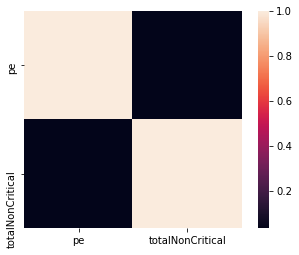

In [61]:
# Search for any correlation in data?
corr = sample_data.corr()
sns.heatmap(corr, square = True)
#No correlation at all between pe and totalNonCritical!
# see kaggle example here:
# https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

Simple visualization analysis


In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df = df[df['STNAME'] == 'Colorado']
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = dict(type = 'choropleth',
           #colorscale = scl,
           locations = df['FIPS'],
           locationmode = 'USA-states', #'country names',
           z = sample_data['totalNonCritical'], 
           text = sample_data['county'],
           colorbar = {'title':'Restaurant_Inspections in Colorado'})
layout = dict(title = 'Restaurant_Inspections_in_Tri-County_Colorado', 
              geo = dict(
                scope=['Colorado'],
                projection=dict( type='colorado usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
             )
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [ ]:
import plotly.plotly as py

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)
#url = py.plot(fig, filename='d3-cloropleth-map') ## for webbrowser plotting
iplot(fig)

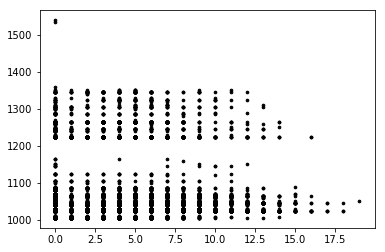

In [71]:
# Using scatter plot to show still no correlation
tN = sample_data['totalNonCritical'].values
pe = sample_data['pe'].values
X = np.array(list(zip(tN, pe)))
plt.scatter(tN, pe, c='black', s=7)

Try Clustering to see if anything make sense?

In [72]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [73]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
#print(C)

[[ 685. 1276.]
 [ 791. 1035.]
 [ 867. 1421.]]


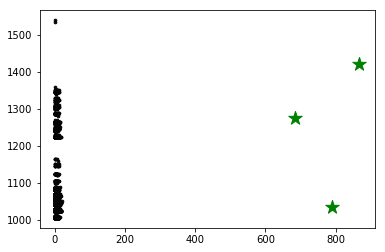

In [74]:
# Plotting along with the Centroids
plt.scatter(tN, pe, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

Using the scikit-Learn approach!

In [75]:

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[ 685. 1276.]
 [ 791. 1035.]
 [ 867. 1421.]]
[[   4.07002053 1055.32854209]
 [   3.59549945 1253.57025247]
 [   3.48224152 1020.61527668]]
